In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [383]:
data = np.array(pd.read_csv("../EJ309-build/EnergyDeposited.csv", header=None))

In [384]:
nData = { 0 : {} , 1 : {} }

for row in data:
    event = row[0]
    ptclID = row[1]
    eDep = row[2]
    ptcl = row[3]
    
    if ptcl not in nData[event].keys():
        nData[event][ptcl] = {}
        
    if ptclID not in nData[event][ptcl].keys():
        nData[event][ptcl][ptclID] = 0

    nData[event][ptcl][ptclID] += eDep

In [385]:
electronDepo = np.array(list(nData[0]['e-'].values()))
protonDepo = np.array(list(nData[1]['proton'].values()))
carbonDepo = np.append(list(nData[1]['C12'].values()), list(nData[1]['C13'].values()))

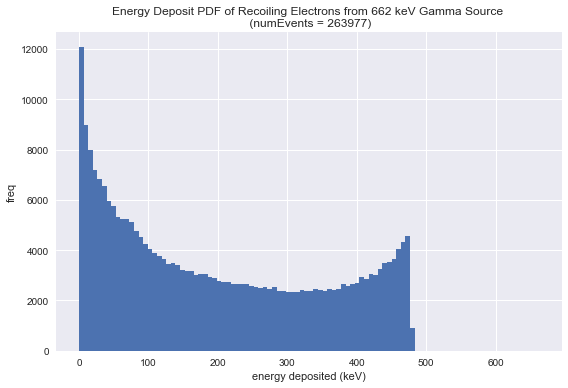

In [386]:
plt.hist(electronDepo / 1000.0, bins = 100)
plt.xlabel("energy deposited (keV)")
plt.ylabel("freq")
plt.title("Energy Deposit PDF of Recoiling Electrons from 662 keV Gamma Source \n (numEvents = " + str(len(electronDepo)) + ")")
plt.tight_layout()
plt.savefig("Edep/electrons.eps")

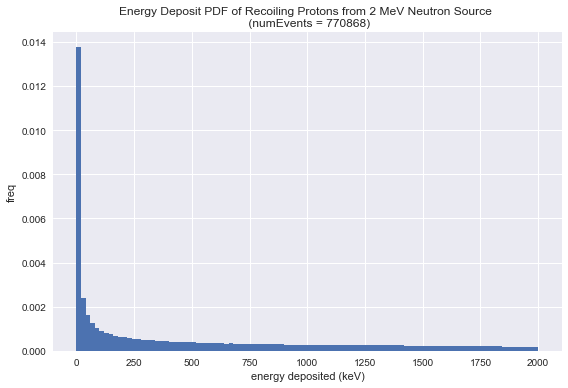

In [387]:
plt.hist(protonDepo / 1000, bins = 100, density = True)
plt.xlabel("energy deposited (keV)")
plt.ylabel("freq")
plt.title("Energy Deposit PDF of Recoiling Protons from 2 MeV Neutron Source \n (numEvents = " + str(len(protonDepo)) + ")")
plt.tight_layout()
plt.savefig("Edep/protons.eps")

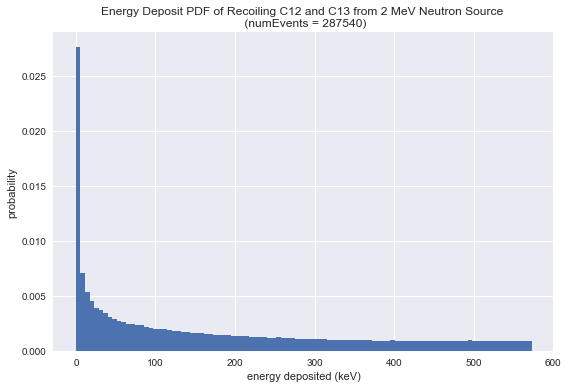

In [388]:
plt.hist(carbonDepo / 1000.0, bins = 100, density = True)
plt.xlabel("energy deposited (keV)")
plt.ylabel("probability")
plt.title("Energy Deposit PDF of Recoiling C12 and C13 from 2 MeV Neutron Source \n (numEvents = " + str(len(carbonDepo)) + ")")
plt.tight_layout()
plt.savefig("Edep/carbon.eps")